# COMP309 Assignment 1
## Setup
First import the libraries and the .arff datasets:

In [ ]:
# import stuff

%matplotlib inline 

import matplotlib.pyplot as plt
import arff, numpy as np
from sklearn import preprocessing
import numpy.random as rng
np.set_printoptions(precision=6)

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_classification, make_circles

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Fixing random state for reproducibility
np.random.seed(10)

In [ ]:
#load banknotes data
data = arff.loads(open("data/banknotes.arff", "rt"))
df = pd.DataFrame(data["data"])
bnk_x = df[range(4)] # first 4 attributes are banknotes information
bnk_y = df[4] # final attribute is 1 for genuine, 2 for forged

#load ionosphere data
data = arff.loads(open("data/ionosphere.arff", "rt"))
df = pd.DataFrame(data["data"])
io_x = df[range(34)] # first 34 are the attributes
io_y = df[34] # final b is for bad scan, g is for good idea

#load steel plates data
data = arff.loads(open("data/steelplate.arff", "rt"))
df = pd.DataFrame(data["data"])
sp_x = df[range(33)] # first 33 attributes are plates information
sp_y = df[33] # final attribute is 1 for genuine, 2 for forged

# put data into a tuple
# 0 = steel plates 1 = ionosphere 2 = banknotes
DATA =  [(sp_x,sp_y),(io_x,io_y),(bnk_x,bnk_y)]

### genResultsForClassifier
* This function runs a classifier for each dataset (after 50 iterations with different splits for each hyperparameter) and puts the results into a 3d array called results[]. Then it uses that array to draw a boxplot for each dataset.
* It works on one classifier at a time.

In [ ]:
# tuple datasets(x,y), x is 2d array of attributes, y is 1d list of classes (fihal column)
# int numSplits - the number of times to generate a new train/test split and run the classifier again
# string hyp_name the name of the hyperparameter to test
# list hyp_vals[] the list of vals to test
# Classifier classifier - the scikit-learn classifier to test
# kwargs **classArgs - the named arguments to pass to the classifier

# return - results[], a 3d array of 3 datasets, n values for the hyperparameter, and i different random splits
# for each classifier, you will have one 3d array of "results"
# the datasets are ordered idx 0= steel plates 1= ionosphere 2= banknotes
# results[dataset_idx] gives you a 2d array of idx=hyperparameter value, val=accuracy for i different random train/test splits
# in the final, there should be 10 different hyperparameter values and 50 different train/test splits
def genResultsForClassifier(datasets, numSplits, hyp_name, hyp_vals, classifier, **classArgs):
    # generate array of results
    results = []
    testErrors = []
    k = 0
    for (x,y) in datasets:
        results.append([])
        testErrors.append([])
        for n in range(len(hyp_vals)): # num neighbours
            results[k].append([])
            testErrors[k].append([])
            for i in range(numSplits): # repeat 50 times
                # different random split each time
                #set random state for reproducbility
                trX, teX, trY, teY = train_test_split(x, y, test_size=0.5, random_state=300+i)
                # create the classifier
                classArgs[hyp_name] = hyp_vals[n]
                c = classifier(**classArgs) #define the classifier and its arguments
                c.fit(trX, trY)
                #results[k][n].append(listMatch(c.predict(teX),teY)) # match predicted with test
                testErrors[k][n].append(c.score(teX,teY))
                
        k+=1
        
    # draw the boxplot
    drawResults(results,hyp_name,hyp_vals)
    
    # print the mean test error for each value
    for i in range(3):
        print("Dataset ", i)
        means = []
        for j in range(10):
            mean = sum(testErrors[i][j])/len(testErrors[i][j])
            print(hyp_vals[j], " ", mean)
            means.append(mean)
        print("best mean value: ", max(means))
            
            

In [ ]:
def drawResults(resultTable, hyp_name, hyp_vals):
    xtks = np.arange(len(hyp_vals))+1
    xtlab = list([str(val) for val in hyp_vals])       
    fig, axes = plt.subplots(1, 3, figsize = (15,5))
    axes.flat[0].set_title("Steel Plate Faults")
    axes.flat[0].set(ylabel="Classifier Accuracy", xlabel=hyp_name)
    axes.flat[1].set(title = "Ionosphere", xlabel=hyp_name)
    axes.flat[2].set(title="Banknotes", xlabel=hyp_name)
    axes.flat[0].set_xticklabels(xtlab,rotation=45)
    axes.flat[1].set_xticklabels(xtlab,rotation=45)
    axes.flat[2].set_xticklabels(xtlab,rotation=45)
    
    axes[0].boxplot(resultTable[0], labels=xtlab)
    axes[1].boxplot(resultTable[1], labels=xtlab)
    axes[2].boxplot(resultTable[2], labels=xtlab)

    plt.show()

### listMatch
* This returns (as a float) what fraction of the members of two lists match. It's used as a metric for the accuracy of a classifier to match the data.

In [ ]:
def listMatch(a,b):
    if (len(a) != len(b)):
        raise Exception("lists must be the same size")
    return sum(1 for x,y in zip(a,b) if x == y) / len(a)

## Classifiers
Here, draw the boxplots for the various classifiers.

In [10]:
#KNN - steelplate, ionosphere, banknotes
print("kNN")
hyp_vals = list(range(1,11))
#genResultsForClassifier(DATA, 50, "n_neighbors", hyp_vals, KNeighborsClassifier, n_neighbors = 1)

#NAIVE BAYES -- xticks not working?
print("\nnaivbayes")
hyp_vals = [1e-10, 1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
#genResultsForClassifier(DATA, 50, "var_smoothing", hyp_vals, GaussianNB, var_smoothing = 1)

#LOGISTIC REGRESSION
print("\nlogreg")
hyp_vals = np.arange(0.5,5.5,0.5)
#genResultsForClassifier(DATA,50, "C", hyp_vals, LogisticRegression, C = 1, max_iter=100000)

#DECISION TREE
print("\ndectree")
hyp_vals = list(range(1,11))
#genResultsForClassifier(DATA,50, "max_depth", hyp_vals, DecisionTreeClassifier,max_depth=1)

#GRADIENT BOOSTING
print("\ngradboost")
hyp_vals = list(range(1,11))
genResultsForClassifier(DATA,50, "max_depth", hyp_vals, GradientBoostingClassifier,max_depth=1)

#RANDOM FOREST
print("\nrandforest")
hyp_vals = list(range(1,11))
genResultsForClassifier(DATA,50, "max_depth", hyp_vals, RandomForestClassifier, max_depth=1)

#MLP
print("\nMLPClassifier")
hyp_vals = [1e-5,1e-4,1e-3,1e-2,0.1,0.2,0.5,1,5,1e+1]
genResultsForClassifier(DATA,50, "alpha", hyp_vals, MLPClassifier, alpha=1, max_iter=1000)
print("")

kNN

naivbayes

logreg

dectree

gradboost
Dataset  0
1   1.0
2   1.0
3   1.0
4   1.0
5   1.0
6   1.0
7   1.0
8   1.0
9   1.0
10   1.0
best mean value:  1.0
Dataset  1
1   0.9202272727272728
2   0.9240909090909092
3   0.9188636363636364
4   0.9082954545454547
5   0.880568181818182
6   0.8737500000000001
7   0.8711363636363636
8   0.8731818181818184
9   0.8772727272727273
10   0.8754545454545454
best mean value:  0.9240909090909092
Dataset  2
1   0.9662973760932946
2   0.9894752186588923
3   0.9908746355685135
4   0.9900583090379009
5   0.9841107871720116
6   0.9812827988338192
7   0.9807580174927114
8   0.9798833819241982
9   0.9798833819241982
10   0.9796501457725948
best mean value:  0.9908746355685135

randforest
Dataset  0
1   0.6546446961894955
2   0.7279093717816685
3   0.8431925849639548
4   0.916683831101957
5   0.9551596292481979
6   0.9722142121524203
7   0.9781668383110197
8   0.9824304840370753
9   0.9845520082389286
10   0.9866529351184344
best mean value:  0.9866529351184

# Part 2 - Clustering

In [108]:
# make data
rstate = 42

blobX,y = make_blobs(n_samples=1000,random_state=rstate)
classX,y = make_classification(n_samples=1000,n_clusters_per_class=1,random_state=rstate)
circX,y = make_circles(n_samples=1000,noise=0.3,random_state=rstate)

In [109]:
def drawClusterScatter(clusterAlg):  
    blobLabels = clusterAlg.fit_predict(blobX)
    classLabels = clusterAlg.fit_predict(classX)
    circLabels = clusterAlg.fit_predict(circX)
    filBlob = [blobX[blobLabels == i] for i in range(3)]
    filClass = [classX[classLabels == i] for i in range(3)]
    filCirc = [circX[labels == i] for i in range(3)]
    filtered_labels = [filBlob,filClass,filCirc]
    fig, axes = plt.subplots(1, 3, figsize = (15,5))
    axes.flat[0].set_title("Blobs Dataset")
    axes.flat[1].set(title="Classification Dataset")
    axes.flat[2].set(title="Circles Dataset")
    idx=0
    for ax in axes.flat:
        for i in range(3):
            ax.scatter(filtered_labels[idx][i][:,0] , filtered_labels[idx][i][:,1])
        idx+=1
    plt.show()

kmeans


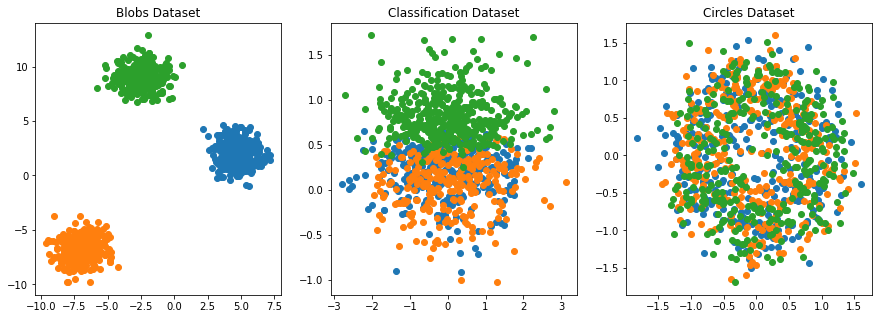

afprop


c:\users\judah\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
c:\users\judah\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "


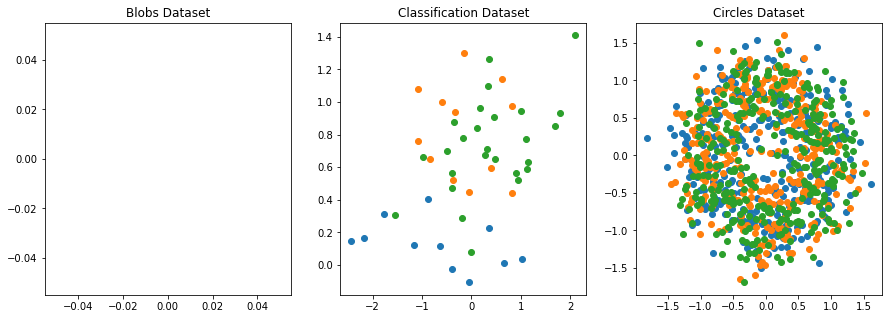

DBSCAN


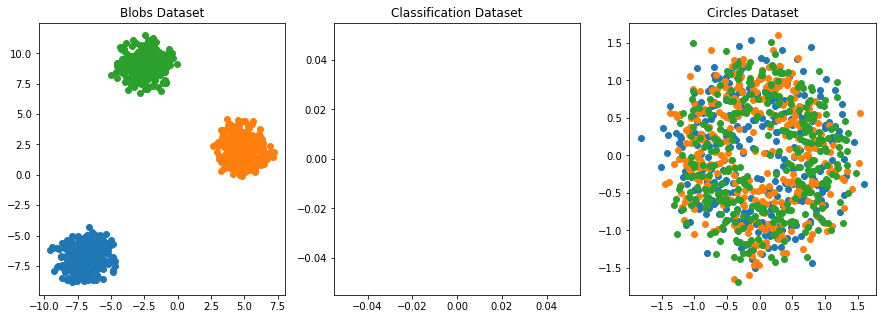

gaussmixture


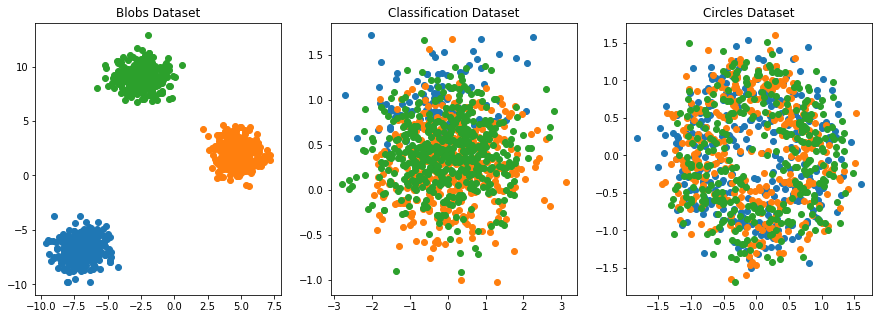

BIRCH


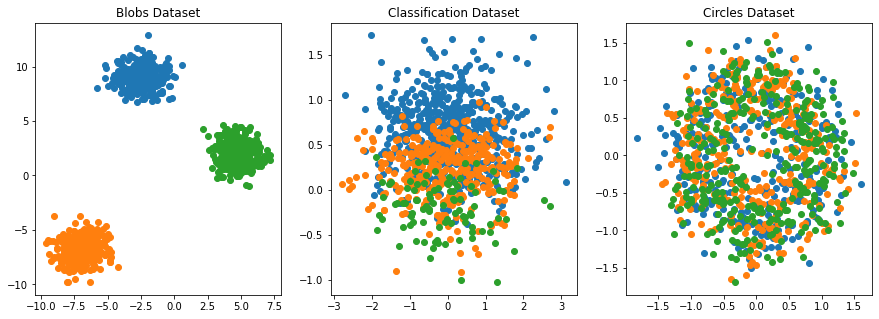

Agglomerative Clustering


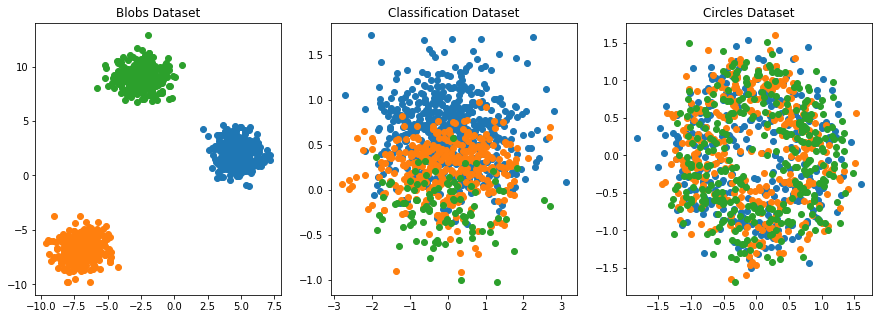

MeanShift


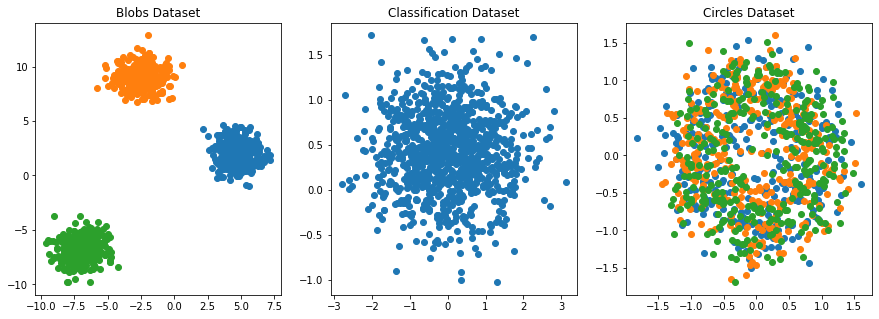

In [120]:
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN, Birch, AgglomerativeClustering, MeanShift
from sklearn.mixture import GaussianMixture

#kmeans
print("kmeans")
kmeans = KMeans(n_clusters=3, random_state=rstate)
drawClusterScatter(kmeans)

#affinity propagation
print("afprop")
afprop = AffinityPropagation(random_state=rstate, convergence_iter = 100)
drawClusterScatter(afprop)

#DBSCAN
print("DBSCAN")
dsc = DBSCAN()
drawClusterScatter(dsc)

#gaussmixture
print("gaussmixture")
gmix = GaussianMixture(n_components = 3,random_state = rstate)
drawClusterScatter(gmix)

# BIRCH
print("BIRCH")
b = Birch(n_clusters=3)
drawClusterScatter(b)

# AgglomerativeClustering
print("Agglomerative Clustering")
agglo = AgglomerativeClustering(n_clusters = 3)
drawClusterScatter(agglo)

# mean shift 
print("MeanShift")
mshift = MeanShift()
drawClusterScatter(mshift)